# Organoid Single Image Example Workflow

This notebook demonstrates each step of the workflow applied to the organoid dataset.

To run this notebook, you need to place an organoid image in a folder named `Organoids` under a `data` folder in the root of this repository (or adjust the path accordingly). In this example, we will use the image named `Patient 3 organoids_B110E493636-B580-44C2-9154-49477C2626C6.tif`.

Below is an exampe of the folder structure:

```
Brightfield-3D-models-image-analysis
|
├─ code
|   |
|   ⁞
|   
├─ data
|   |
⁞   ├─ Organoids
    |    |
    |    |
    ⁞    ├─ Patient_1
         |    |
         |    ├─ Day_1
         |    |    |
         |    |    ├─ media1.tif
         |    |    ├─ media2.tif
         ⁞    ⁞    ⁞
```

The conda environment used for this notebook can be created following the instructions in the [README.md](README.md) file.

If you want to run the workflow for multiple images, please check the [Batch_processing_workflow.ipynb](Batch_processing_workflow.ipynb) notebook.

## Import libraries

In [ ]:
import pandas
import napari
import napari_simpleitk_image_processing as nsitk
import pyclesperanto_prototype as cle

from skimage.io import imread
from napari_skimage_regionprops import regionprops_table, get_table
from pathlib import Path

%load_ext watermark

## Open napari

In [2]:
viewer = napari.Viewer()

## Read image and add it to the viewer

In [3]:
image_path = Path("../../data/Organoids/Patient_3/Day_1/Patient 3 organoids_B110E493636-B580-44C2-9154-49477C2626C6.tif")
image = imread(image_path) 
viewer.add_image(image, name=image_path.stem)

<Image layer 'Patient 3 organoids_B110E493636-B580-44C2-9154-49477C2626C6' at 0x19844b746e0>

## Apply Laplacian of Gaussian Filter

Parameters:
- sigma = 1

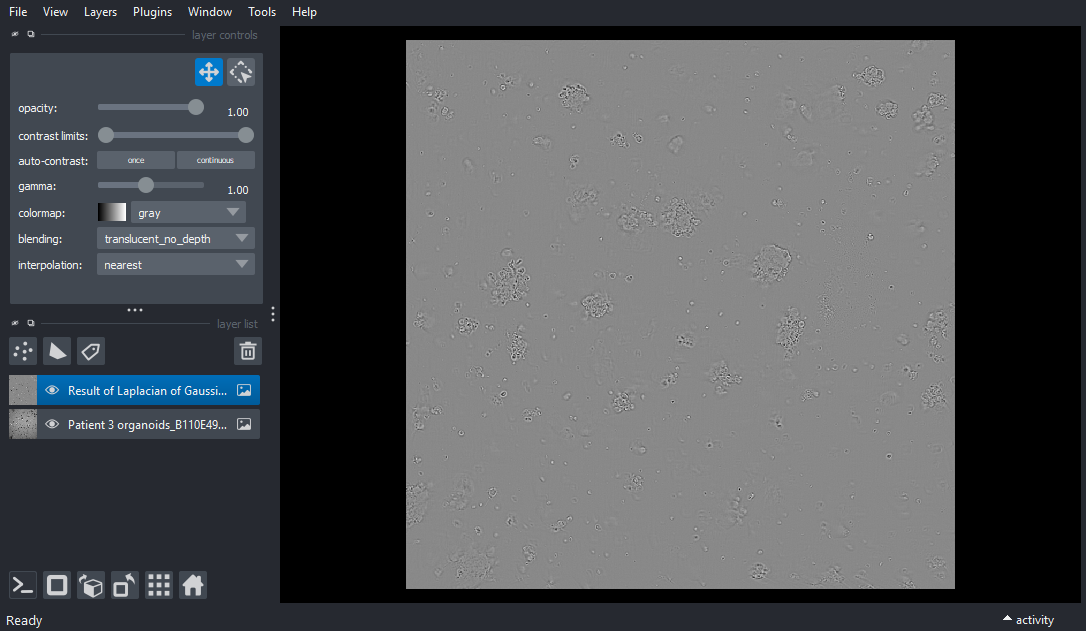

In [4]:
image1_L = nsitk.laplacian_of_gaussian_filter(image, 1.0)
viewer.add_image(
    image1_L, name='Result of Laplacian of Gaussian (n-SimpleITK)')
napari.utils.nbscreenshot(viewer)

## Apply Standard Deviation Filter

Parameters:
- sigma_x = 1
- sigma_y = 1
- sigma_z = 0

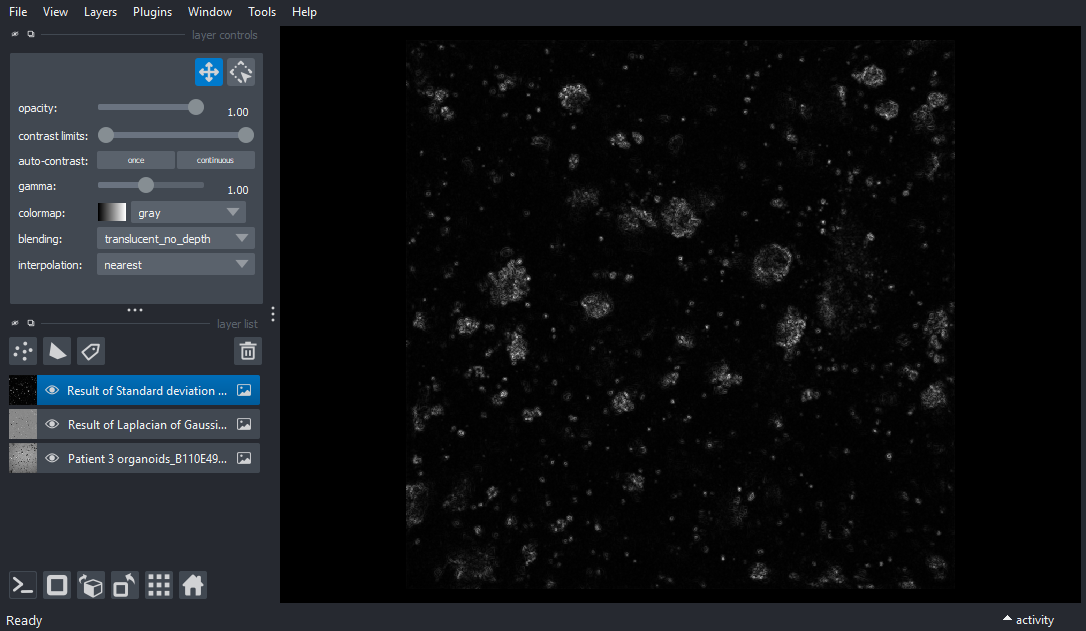

In [5]:
image2_S = nsitk.standard_deviation_filter(image1_L, 1, 1, 0)
viewer.add_image(
    image2_S, name='Result of Standard deviation filter (noise, n-SimpleITK)')
napari.utils.nbscreenshot(viewer)

## Apply Threshold Otsu

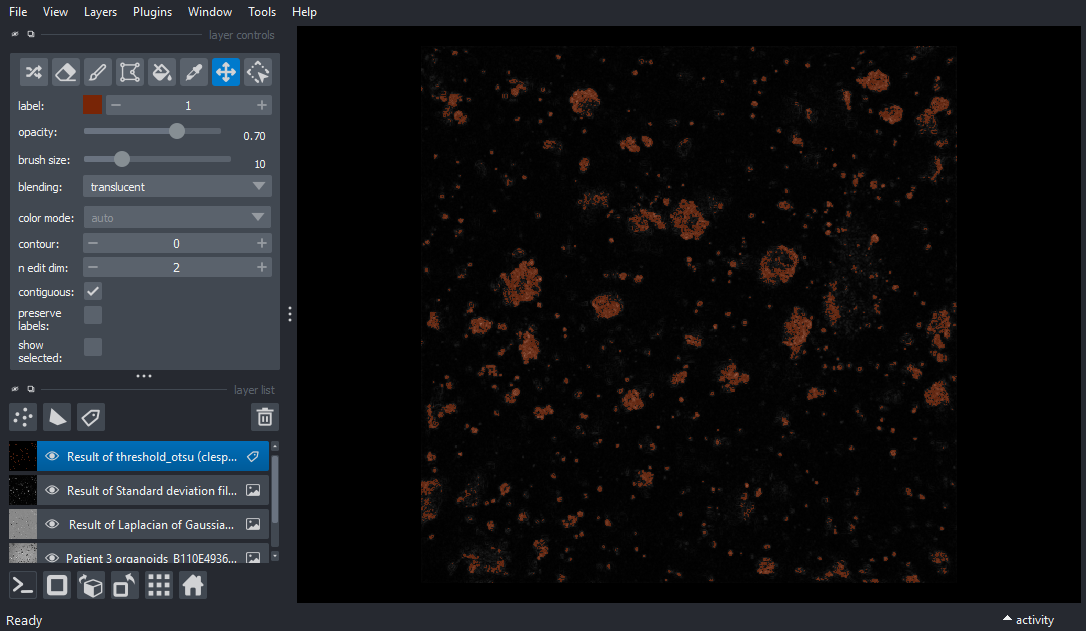

In [6]:
image3_to = cle.threshold_otsu(image2_S)
viewer.add_labels(image3_to, name='Result of threshold_otsu (clesperanto)')
napari.utils.nbscreenshot(viewer)

## Apply Closing Labels

Parameters:
- radius = 1

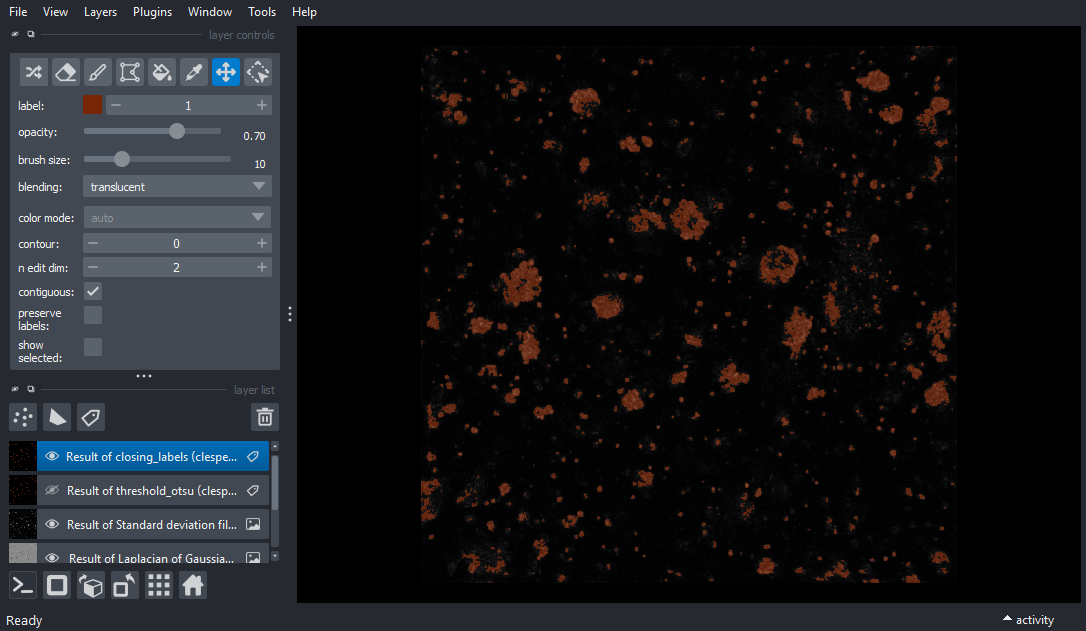

In [7]:
image4_cl = cle.closing_labels(image3_to, None, 1.0)
viewer.add_labels(image4_cl, name='Result of closing_labels (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Binary Fill Holes

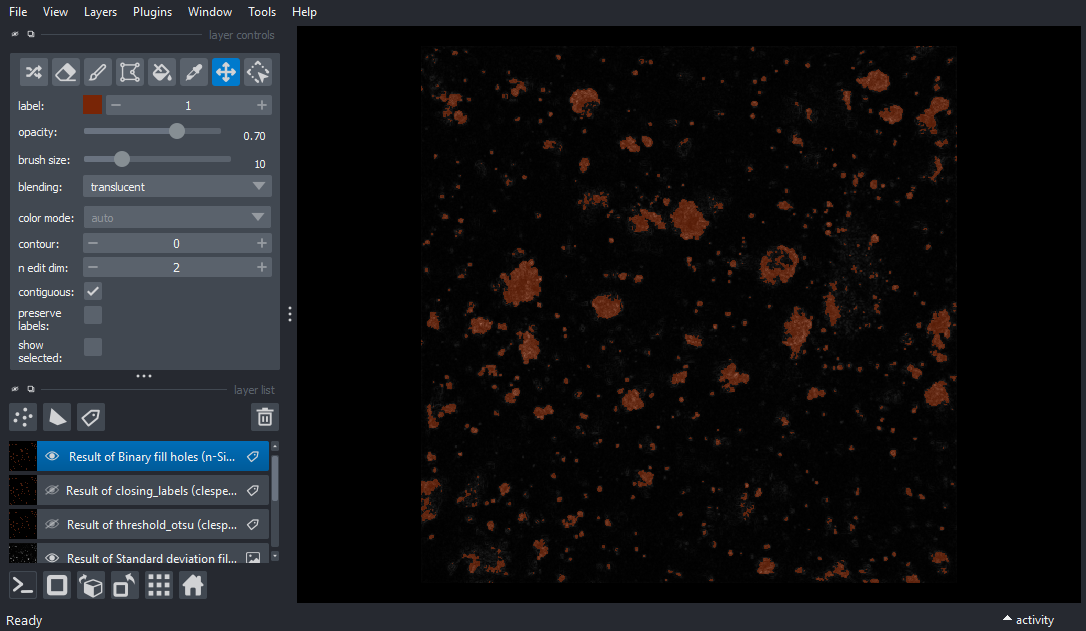

In [8]:
image5_B = nsitk.binary_fill_holes(image4_cl)
viewer.add_labels(image5_B, name='Result of Binary fill holes (n-SimpleITK)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Connected Components Labeling

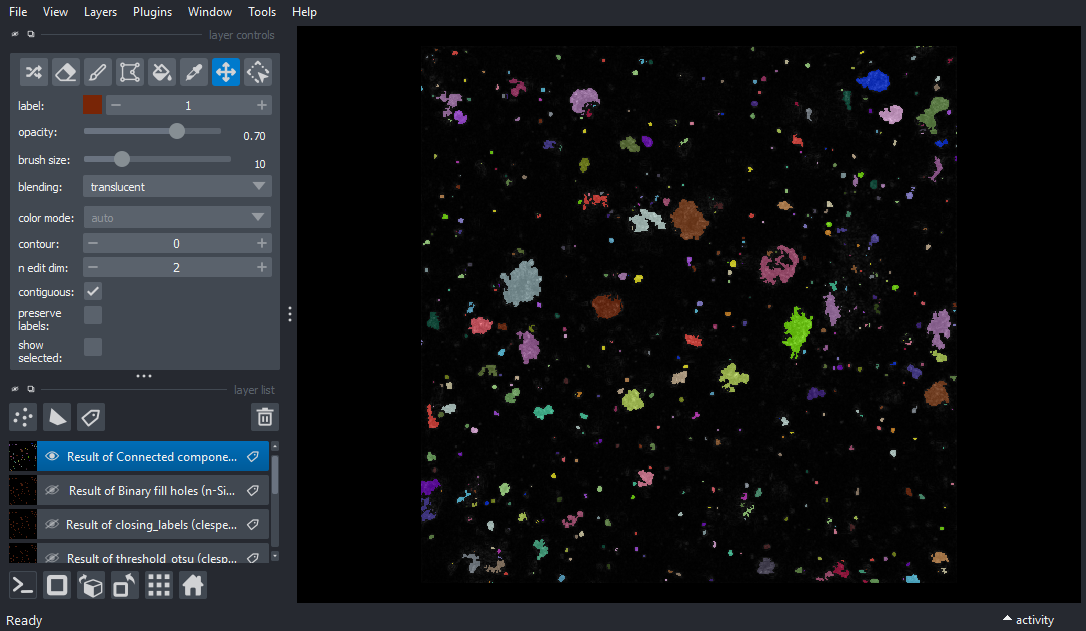

In [9]:
image6_C = cle.label(image5_B)
viewer.add_labels(
    image6_C, name='Result of Connected component labeling (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Exclude Small Labels

Parameters:
- min_size = 300

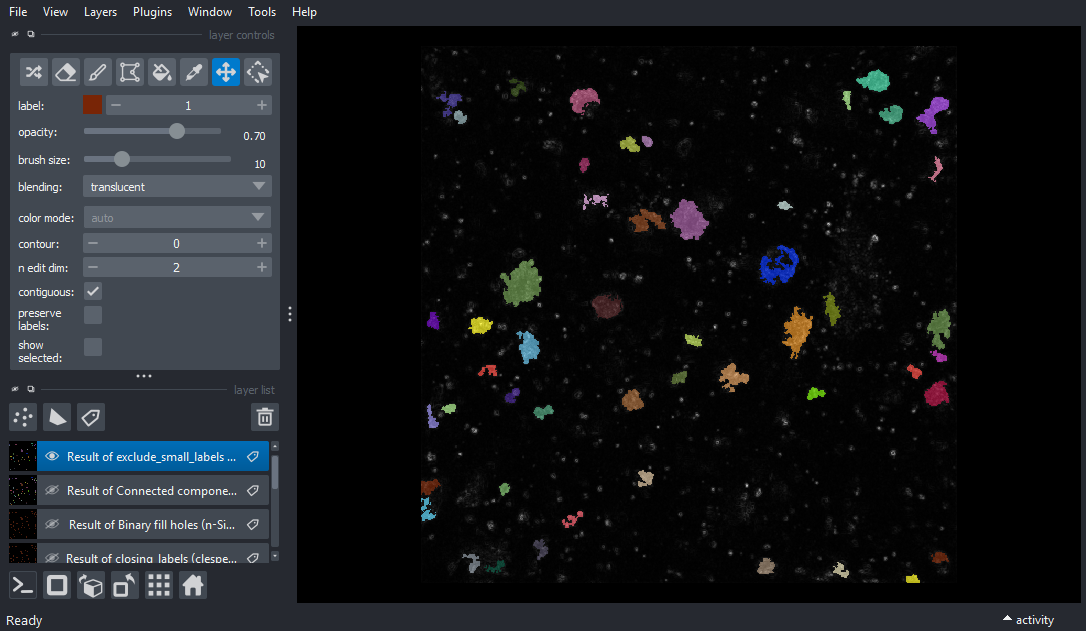

In [10]:
image7_esl = cle.exclude_small_labels(image6_C, None, 300.0)
viewer.add_labels(
    image7_esl, name='Result of exclude_small_labels (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Exclude Labels on Edges

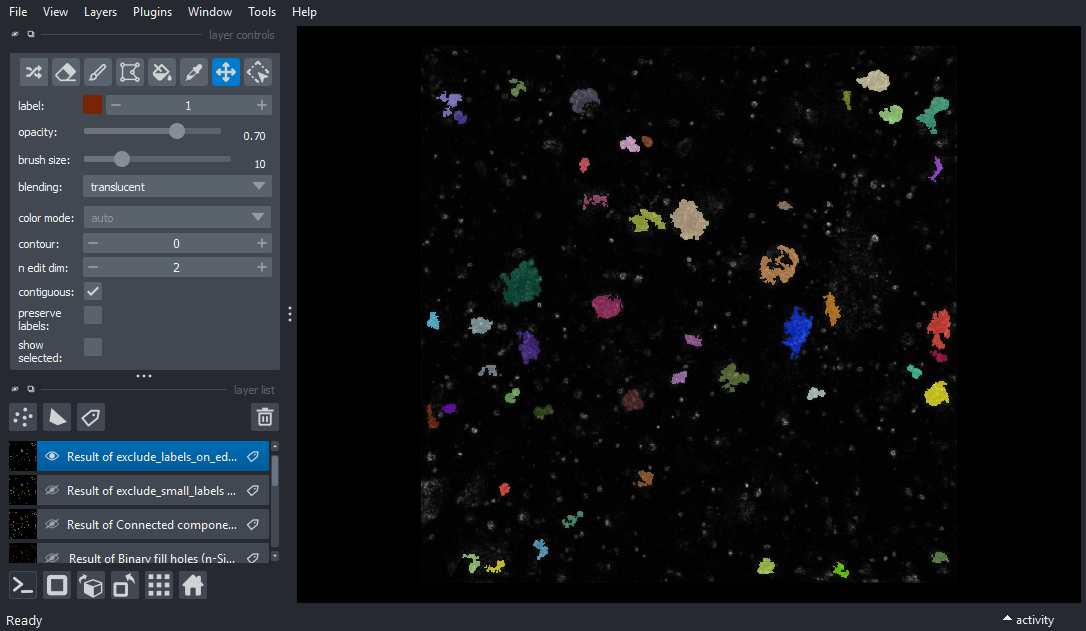

In [11]:
image8_eloe = cle.exclude_labels_on_edges(image7_esl)
viewer.add_labels(
    image8_eloe, name='Result of exclude_labels_on_edges (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Show Labels over Original Image

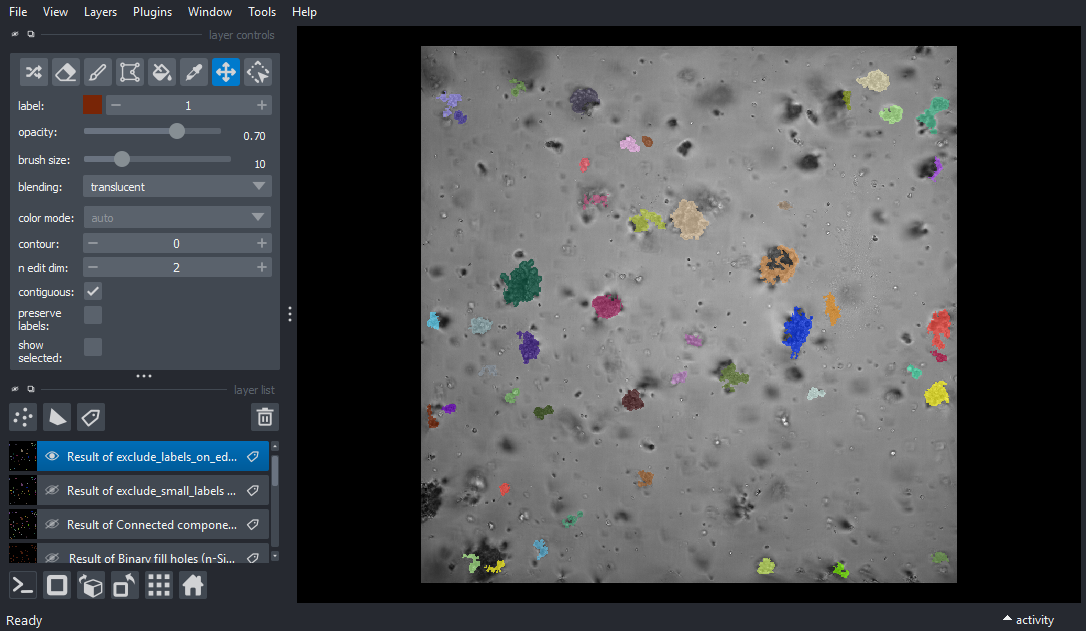

In [12]:
viewer.layers[1].visible = False
viewer.layers[2].visible = False
napari.utils.nbscreenshot(viewer)

## Extract Area and Other Size-related Features

In [13]:
regionprops_table(
    image,
    image8_eloe,
    size=True,
    intensity=False,
    napari_viewer=viewer,
)
table = pandas.DataFrame(get_table(viewer.layers[-1], viewer).get_content())
table.head()

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


label   area  bbox_area  equivalent_diameter  convex_area  index
0      1  506.0     1058.0            25.382262        696.0      1
1      2  522.0      840.0            25.780439        639.0      2
2      3  896.0     2450.0            33.776066       1577.0      3
3      4  363.0      522.0            21.498511        408.0      4
4      5  433.0      675.0            23.480049        510.0      5

## Version Information

In [14]:
%watermark -v -m --gpu -p napari,numpy,pyclesperanto_prototype,pandas,skimage,napari_simpleitk_image_processing

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

napari                           : 0.5.0
numpy                            : 2.2.6
pyclesperanto_prototype          : 0.24.4
pandas                           : 2.2.3
skimage                          : 0.25.1
napari_simpleitk_image_processing: 0.4.9

Compiler    : MSC v.1943 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

GPU Info: 
  GPU 0: NVIDIA GeForce GTX 1650 Ti with Max-Q Design

